In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cria objeto com o caminho da pasta do Projeto
from pathlib import Path
#pasta_projeto = Path('/content/drive/MyDrive/AGU_Notebooks/Labs R2D2/')
pasta_projeto = Path(Path.cwd())

import nltk
from sklearn.model_selection import train_test_split


from nltk.stem import RSLPStemmer


In [3]:
dados = pd.read_parquet(pasta_projeto /'dados_desbalanceados.parquet')

In [4]:
print(dados.shape)
dados['coordenacao'].value_counts()

(33111, 6)


coordenacao
COREJEF     13221
CORESP      11999
CORESE       3759
CORESA       1951
COREM        1111
COREPAM       613
CORAT         367
CORETRAB       55
COREPRO        35
Name: count, dtype: int64

In [5]:
dados

,cnj,orgao,classe,tipo,coordenacao,peticao_processada
index,,,,,,
0,10437601020204013300,2ª RELATORIA DA 3ª TURMA RECURSAL DA SJBA,RECURSO INOMINADO CÍVEL,INDENIZAÇÃO POR DANO AMBIENTAL,COREJEF,vara juizados especiais federais secao judicia...
1,10028658120234013500,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",CORESE,juizo 1 vara secao judiciaria estado goias dis...
2,10028363120234013500,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",CORESE,juizo 1 vara secao judiciaria estado goias dis...
3,10028622920234013500,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",CORESE,juizo 1 vara secao judiciaria estado goias dis...
4,10030355320234013500,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",CORESE,juizo 1 vara secao judiciaria estado goias dis...
...,...,...,...,...,...,...
35645,10619787220234013400,4ª VARA FEDERAL CÍVEL DA SJDF,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"REAJUSTES DE REMUNERAÇÃO, PROVENTOS OU PENSÃO",CORESE,inicial anexa
35647,10599157420234013400,4ª VARA FEDERAL CÍVEL DA SJDF,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"REAJUSTES DE REMUNERAÇÃO, PROVENTOS OU PENSÃO",CORESE,1 4 vara secao judiciaria distrito distribuica...
35648,10638251220234013400,4ª VARA FEDERAL CÍVEL DA SJDF,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"REAJUSTES DE REMUNERAÇÃO, PROVENTOS OU PENSÃO",CORESE,vara subsecao judiciaria distrito ref cumprime...


In [6]:
# define variaveis independentes e variável dependente(TARGET)
X = dados[['tipo','classe','orgao']]
y = dados['coordenacao']

In [7]:
# Transformação das variáveis independentes categórica para numérica

X_dum = pd.get_dummies(X[['tipo','classe','orgao']])
X_dum.shape


(33111, 1242)

In [8]:
X_dum = X_dum.astype(int)

In [9]:
X_dum

,tipo_1/3 DE FÉRIAS,tipo_ABATIMENTO PROPORCIONAL DO PREÇO,tipo_ABONO DA LEI 8.178/91,tipo_ABONO DE PERMANÊNCIA,tipo_ABONO DE PERMANÊNCIA EM SERVIÇO (ART. 87),tipo_ABONO PECUNIÁRIO (ART. 78 LEI 8.112/1990),tipo_ACESSIBILIDADE,tipo_ACESSO SEM CONCLUSÃO DO ENSINO MÉDIO,tipo_ACESSÃO,tipo_ACIDENTE DE TRABALHO,...,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE PARNAÍBA-PI,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE PAULO AFONSO-BA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE REDENÇÃO-PA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE RIO VERDE-GO,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE SÃO RAIMUNDO NONATO-PI,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TABATINGA-AM,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TEIXEIRA DE FREITAS-BA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TUCURUÍ-PA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE URUAÇU-GO,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE VILHENA-RO
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35647,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
dados.dtypes

cnj                   object
orgao                 object
classe                object
tipo                  object
coordenacao           object
peticao_processada    object
dtype: object

In [11]:
# Separação dos dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, stratify=y, test_size=0.20, random_state=42)

In [12]:
X_train

,tipo_1/3 DE FÉRIAS,tipo_ABATIMENTO PROPORCIONAL DO PREÇO,tipo_ABONO DA LEI 8.178/91,tipo_ABONO DE PERMANÊNCIA,tipo_ABONO DE PERMANÊNCIA EM SERVIÇO (ART. 87),tipo_ABONO PECUNIÁRIO (ART. 78 LEI 8.112/1990),tipo_ACESSIBILIDADE,tipo_ACESSO SEM CONCLUSÃO DO ENSINO MÉDIO,tipo_ACESSÃO,tipo_ACIDENTE DE TRABALHO,...,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE PARNAÍBA-PI,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE PAULO AFONSO-BA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE REDENÇÃO-PA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE RIO VERDE-GO,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE SÃO RAIMUNDO NONATO-PI,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TABATINGA-AM,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TEIXEIRA DE FREITAS-BA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TUCURUÍ-PA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE URUAÇU-GO,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE VILHENA-RO
index,,,,,,,,,,,,,,,,,,,,,
13054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.preprocessing import LabelEncoder

# Cria uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Converte as classes de treinamento para números inteiros
y_train_encoded = label_encoder.fit_transform(y_train)

In [14]:
############################## a partir daqui um novo notebook.... preciso entender cmo salvar (X_train, y_train) e (X_test, y_test)

In [15]:
!pip install --upgrade pandas xgboost

In [16]:
# importação das bibliotecas necessárias para treino e teste do modelo e métricas
from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score


In [17]:
# importa o modelo XGBOOST
from xgboost import XGBClassifier

# instancia o modelo
model = XGBClassifier()

# treina e testa o modelo
model.fit(X_train, y_train_encoded)

y_test_encoded = label_encoder.transform(y_test)

# Avalia o modelo
accuracy = model.score(X_test, y_test_encoded)
print(f"Acurácia do modelo: {accuracy}")


Acurácia do modelo: 0.9622527555488449


In [18]:
model.feature_importances_

array([0.        , 0.00029252, 0.        , ..., 0.        , 0.        ,
       0.00045459], dtype=float32)

In [26]:
import seaborn as sns
feature_importances = model.feature_importances_

# Criar um DataFrame com as importâncias e os nomes das features
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Ordenar o DataFrame por importância em ordem decrescente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Selecionar as top N features (por exemplo, top 10)
top_features = importance_df.head(10)['Feature'].tolist()

# Imprimir as top N features
print("Top 10 Features:")
print(top_features)

Top 10 Features:
['classe_REINTEGRAÇÃO / MANUTENÇÃO DE POSSE', 'classe_PROCEDIMENTO DO JUIZADO ESPECIAL CÍVEL', 'classe_RECURSO INOMINADO CÍVEL', 'classe_CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS', 'tipo_FIES', 'tipo_NÃO PADRONIZADO', 'tipo_FUNDEB/FUNDEF/FUNDO DE MANUTENÇÃO E DESENVOLVIMENTO DO ENSINO FUNDAMENTAL E DE VALORIZAÇÃO DO MAGISTÉRIO', 'classe_CUMPRIMENTO DE SENTENÇA CONTRA A FAZENDA PÚBLICA', 'tipo_ONCOLÓGICO', 'tipo_ÍNDICE DE 13,23% (LEI 10698/2003)']


C:\Users\luciana.angrisano\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\luciana.angrisano\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\luciana.angrisano\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


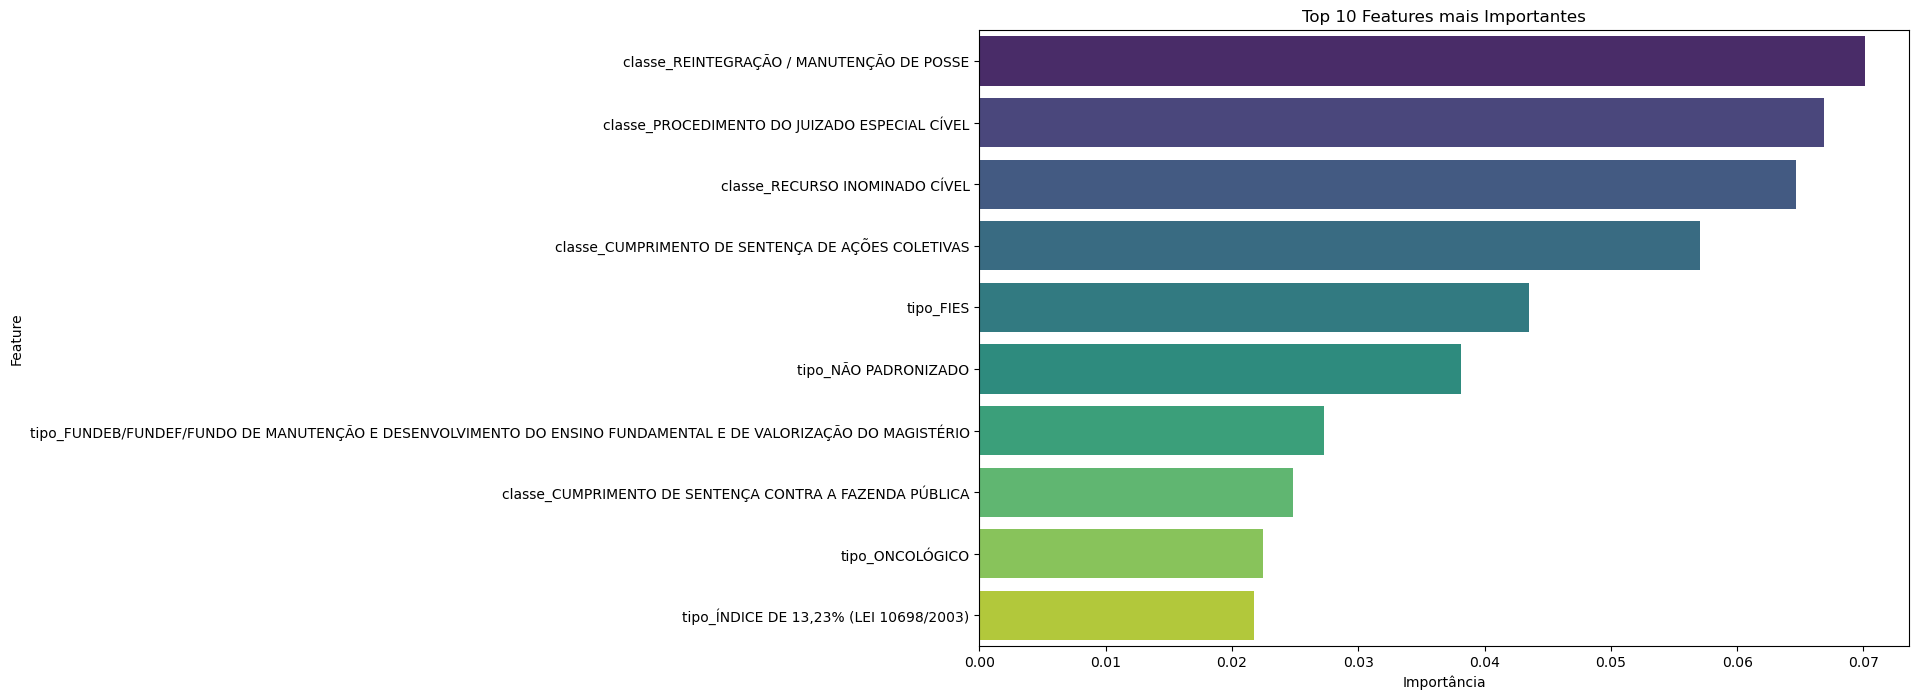

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Usando o DataFrame 'importance_df' criado anteriormente

# Plotar as top N features em um gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Features mais Importantes')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

In [17]:
#importou a biblioteca para medir a acurácia balanceada
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test_encoded, model.predict(X_test)))

0.8404449738940294


In [18]:
# importa a biblioteca para visualização das métricas
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, model.predict(X_test)))
y_pred_encoded = model.predict(X_test)


              precision    recall  f1-score   support

           0       0.97      0.90      0.94        73
           1       0.99      0.99      0.99      2645
           2       0.87      0.70      0.78       222
           3       0.93      0.81      0.87       123
           4       1.00      0.57      0.73         7
           5       0.99      0.96      0.97       390
           6       0.95      0.91      0.93       752
           7       0.94      0.98      0.96      2400
           8       1.00      0.73      0.84        11

    accuracy                           0.96      6623
   macro avg       0.96      0.84      0.89      6623
weighted avg       0.96      0.96      0.96      6623



In [19]:
# Converte os resultados preditos de volta para os nomes originais
#y_pred_original = label_encoder.inverse_transform(y_pred_encoded)

# Imprime o relatório de classificação
#print(classification_report(y_test, y_pred_original))

In [20]:
!pip install seaborn
!pip install matplotlib

<Figure size 1000x800 with 0 Axes>

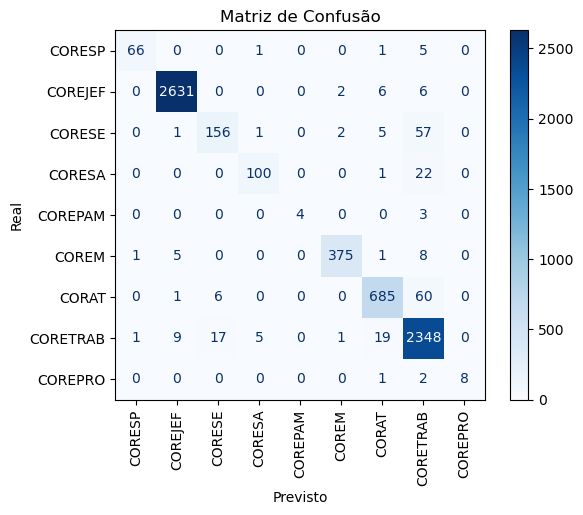

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de confusão
cm = confusion_matrix(y_test_encoded, model.predict(X_test))

# Define o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Cria o objeto ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test_encoded, display_labels=y_test.unique(), cmap="Blues",  xticks_rotation="vertical")

# Adiciona rótulos aos eixos
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")

# Mostra o gráfico
plt.show()


In [22]:
!pip install -U imbalanced-learn


In [23]:
pip install --upgrade numpy


Note: you may need to restart the kernel to use updated packages.


In [24]:
y_train_encoded = label_encoder.fit_transform(y_train)


In [25]:
X_train

,tipo_1/3 DE FÉRIAS,tipo_ABATIMENTO PROPORCIONAL DO PREÇO,tipo_ABONO DA LEI 8.178/91,tipo_ABONO DE PERMANÊNCIA,tipo_ABONO DE PERMANÊNCIA EM SERVIÇO (ART. 87),tipo_ABONO PECUNIÁRIO (ART. 78 LEI 8.112/1990),tipo_ACESSIBILIDADE,tipo_ACESSO SEM CONCLUSÃO DO ENSINO MÉDIO,tipo_ACESSÃO,tipo_ACIDENTE DE TRABALHO,...,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE PARNAÍBA-PI,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE PAULO AFONSO-BA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE REDENÇÃO-PA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE RIO VERDE-GO,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE SÃO RAIMUNDO NONATO-PI,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TABATINGA-AM,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TEIXEIRA DE FREITAS-BA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TUCURUÍ-PA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE URUAÇU-GO,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE VILHENA-RO
index,,,,,,,,,,,,,,,,,,,,,
13054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train.columns = X_train.columns.astype(str)

ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train_encoded)

In [28]:
from sklearn.metrics import accuracy_score
# instancia o modelo balanceado
model_balanced = XGBClassifier()

# treina e testa o modelo balanceado
model_balanced.fit(X_train_resampled, y_train_resampled)

# Avalia o modelo balanceado
accuracy_balanced = model_balanced.score(X_test, y_test_encoded)
print(f"Acurácia do modelo: {accuracy_balanced}")

# avalia o modelo com accuracy_score
y_pred = model_balanced.predict(X_test)
accuracy_score_value = accuracy_score(y_test_encoded, y_pred)
print(f"Acurácia do modelo accuracy_score: {accuracy_score_value}")


Acurácia do modelo: 0.9459459459459459
Acurácia do modelo accuracy_score: 0.9459459459459459


In [29]:
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test_encoded, model_balanced.predict(X_test)))

0.8648084923129811


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, model_balanced.predict(X_test)))


              precision    recall  f1-score   support

           0       0.83      0.92      0.87        73
           1       1.00      0.99      0.99      2645
           2       0.48      0.87      0.62       222
           3       0.79      0.89      0.84       123
           4       1.00      0.57      0.73         7
           5       0.97      0.98      0.98       390
           6       0.94      0.92      0.93       752
           7       0.98      0.91      0.94      2400
           8       0.89      0.73      0.80        11

    accuracy                           0.95      6623
   macro avg       0.88      0.86      0.86      6623
weighted avg       0.96      0.95      0.95      6623



In [31]:
# Converte os resultados preditos de volta para os nomes originais
y_pred_original = label_encoder.inverse_transform(model_balanced.predict(X_test))

# Imprime o relatório de classificação
print(classification_report(y_test, y_pred_original))

              precision    recall  f1-score   support

       CORAT       0.83      0.92      0.87        73
     COREJEF       1.00      0.99      0.99      2645
       COREM       0.48      0.87      0.62       222
     COREPAM       0.79      0.89      0.84       123
     COREPRO       1.00      0.57      0.73         7
      CORESA       0.97      0.98      0.98       390
      CORESE       0.94      0.92      0.93       752
      CORESP       0.98      0.91      0.94      2400
    CORETRAB       0.89      0.73      0.80        11

    accuracy                           0.95      6623
   macro avg       0.88      0.86      0.86      6623
weighted avg       0.96      0.95      0.95      6623



<Figure size 1000x800 with 0 Axes>

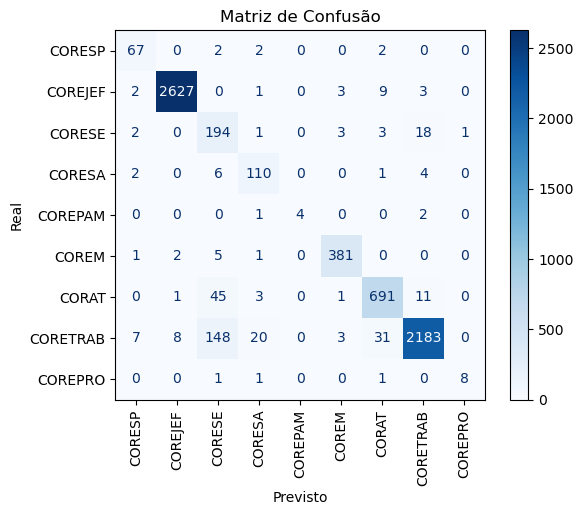

In [32]:
# Calcula a matriz de confusão
cm = confusion_matrix(y_test_encoded, model_balanced.predict(X_test))

# Define o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Cria o objeto ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay.from_estimator(model_balanced,X_test, y_test_encoded, display_labels=y_test.unique(), cmap="Blues",  xticks_rotation="vertical")

# Adiciona rótulos aos eixos
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")

# Mostra o gráfico
plt.show()

